In [ ]:
import tensorflow as tf
import os
import cv2
import random
import imutils
import numpy as np
from google.colab import drive
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import torch.optim as optim
from torch.nn.functional import cross_entropy
import copy
from tensorflow.keras import regularizers
import math
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
# Connect to Google Drive
# We already shared our images folder to  aminpour@ualberta.ca and amirfathi@ualberta.ca ; Please, let us know if you can't access the folders.
# https://drive.google.com/drive/folders/1nLfyzjVp7kEIgIGyEbTOHaezLqt2Odjd?usp=drive_link

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !!!!!!!!! =====   PLEASE DO NOT RUN THIS CODES AGAIN  ===== !!!!!!
# Moderate Dementia folder was already been deleted at this point.

#Importing Images from Drive

images_moderate_dementia = tf.data.Dataset.list_files('/content/drive/Shared drives/BME 677 Shared Drive/images/ModerateDementia/*', shuffle=False)
images_mild_dementia = tf.data.Dataset.list_files('/content/drive/Shared drives/BME 677 Shared Drive/images/MildDementia/*', shuffle=False)
images_verymild_dementia = tf.data.Dataset.list_files('/content/drive/Shared drives/BME 677 Shared Drive/images/VeryMildDementia/*', shuffle=False)
images_non_demented = tf.data.Dataset.list_files('/content/drive/Shared drives/BME 677 Shared Drive/images/NonDemented/*', shuffle=False)
#images_aug_moderate_dementia = tf.data.Dataset.list_files('/content/drive/Shared drives/BME 677 Shared Drive/images/Aug/*', shuffle=False)


print(f"Moderate Dementia: {len(images_moderate_dementia)}")
print(f"Mild Dementia: {len(images_mild_dementia)}")
print(f"Very Mild Dementia: {len(images_verymild_dementia)}")
print(f"Non Demented: {len(images_non_demented)}")
#print(f"Augmented Moderate Dementia: {len(images_aug_moderate_dementia)}")


Moderate Dementia: 488
Mild Dementia: 5002
Very Mild Dementia: 13725
Non Demented: 67222


In [ ]:
# !!!!!!!!! =====  PLEASE DO NOT RUN THIS CODES AGAIN  ===== !!!!!!
# Moderate Dementia folder was already been deleted at this point.

#Class function for sorting Patients ID and Directory
def group_by_patient(dataset):
    patients = defaultdict(list)
    for file_path in dataset.as_numpy_iterator():         #Iteration; for loop condition
        filename = os.path.basename(file_path.decode())  # get just the filename; os.path.basename('/content/drive/.../OAS1_0308_MR1_mpr-1_100.jpg') turns to 'OAS1_0308_MR1_mpr-1_100.jpg'
        patient_id = "_".join(filename.split("_")[:2])    # e.g., "OAS1_0308"; (Split "_" and This takes only the first two items from that list) ; joins together with an underscore
        patients[patient_id].append(file_path.decode())   # patients['OAS1_0308'] -> Append -> '/content/.../OAS1_0308_MR1_mpr-1_100.jpg' -> Patients contains: OAS1_0308 , '/content/.../OAS1_0308_MR1_mpr-1_100.jpg'
    return patients

moderate_patients = group_by_patient(images_moderate_dementia)
mild_patients = group_by_patient(images_mild_dementia)
verymild_patients = group_by_patient(images_verymild_dementia)
non_demented_patients = group_by_patient(images_non_demented)


# Show each patient's image count and count of images they have
print(f"Moderate Dementia patients: {len(moderate_patients)}")
print("=== Moderate Dementia ===")
for pid, imgs in moderate_patients.items():
    print(f"{pid}: {len(imgs)} images")

print(f"\n\nMild Dementia patients: {len(mild_patients)}")
print("=== Mild Dementia ===")
for pid, imgs in mild_patients.items():
    print(f"{pid}: {len(imgs)} images")

print(f"\n\nVery Mild Dementia patients: {len(verymild_patients)}")
print("=== Very Mild Dementia ===")
for pid, imgs in verymild_patients.items():
    print(f"{pid}: {len(imgs)} images")

print(f"\n\nNon Demented patients: {len(non_demented_patients)}")
print("=== Non Demented ===")
for pid, imgs in non_demented_patients.items():
    print(f"{pid}: {len(imgs)} images")


Moderate Dementia patients: 2
=== Moderate Dementia ===
OAS1_0308: 244 images
OAS1_0351: 244 images


Mild Dementia patients: 21
=== Mild Dementia ===
OAS1_0028: 244 images
OAS1_0031: 244 images
OAS1_0035: 244 images
OAS1_0052: 244 images
OAS1_0053: 244 images
OAS1_0056: 244 images
OAS1_0067: 183 images
OAS1_0073: 244 images
OAS1_0122: 244 images
OAS1_0134: 244 images
OAS1_0137: 244 images
OAS1_0184: 244 images
OAS1_0185: 244 images
OAS1_0223: 183 images
OAS1_0268: 244 images
OAS1_0269: 244 images
OAS1_0278: 244 images
OAS1_0291: 244 images
OAS1_0316: 244 images
OAS1_0373: 244 images
OAS1_0382: 244 images


Very Mild Dementia patients: 58
=== Very Mild Dementia ===
OAS1_0003: 244 images
OAS1_0015: 183 images
OAS1_0016: 183 images
OAS1_0021: 244 images
OAS1_0022: 244 images
OAS1_0023: 244 images
OAS1_0039: 183 images
OAS1_0041: 244 images
OAS1_0042: 244 images
OAS1_0046: 244 images
OAS1_0060: 244 images
OAS1_0066: 244 images
OAS1_0082: 244 images
OAS1_0084: 244 images
OAS1_0094: 244 ima

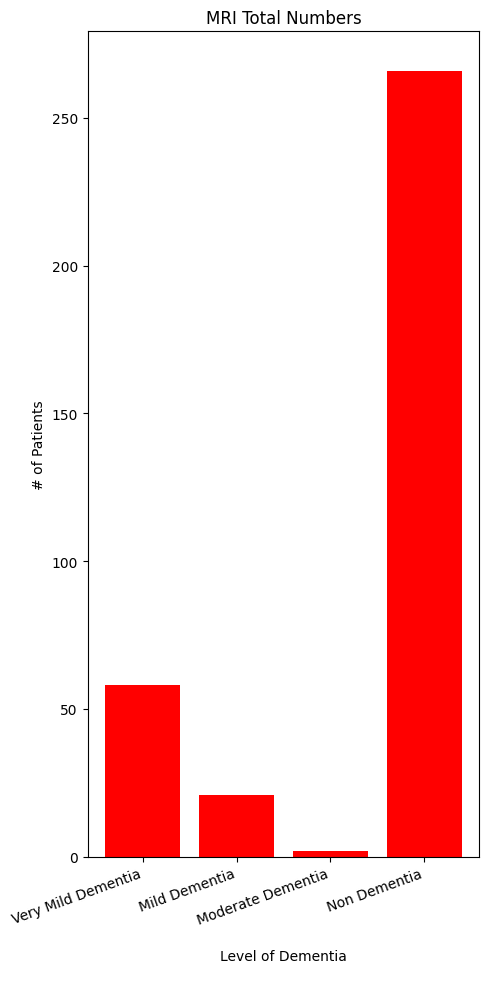

In [ ]:
# !!!!!!!!! =====  PLEASE DO NOT RUN THIS CODES AGAIN  ===== !!!!!!
# Moderate Dementia folder was already been deleted at this point.


#Plot

plot_data = {'Very Mild Dementia': len(verymild_patients), 'Mild Dementia': len(mild_patients), 'Moderate Dementia': len(moderate_patients), 'Non Dementia': len(non_demented_patients)}

x_axis = plot_data.keys()
y_axis = plot_data.values()

fig = plt.figure(figsize=(5,10))
plt.bar(x_axis, y_axis, color="red")
plt.xlabel("\nLevel of Dementia\n")
plt.ylabel("# of Patients")
plt.title("MRI Total Numbers")
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

In [ ]:
#Removing Moderate Dementia Folder

import shutil

moderate_patients_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/ModerateDementia'

if os.path.exists(moderate_patients_path):
    shutil.rmtree(moderate_patients_path)
    print("Folder deleted successfully!")
else:
    print("Folder does not exist.")


Folder deleted successfully!


In [ ]:
# Getting only 5,000+ images from every category, to have a balance dataset.
# Moderate Dementia folder was already been deleted at this point.

def select_patients(patients_list, target_min= 5000, target_max= 5500):
  patients = list(patients_list.items())      # Making "patients" be a list of these: {(OAS1_0308), ('/content/.../OAS1_0308_MR1_mpr-1_100.jpg')}
  print("Total Patients available: ", len(patients))

  random.shuffle(patients)                    # Shuffling the list

  selected_patients = {}
  total_images = 0

  for patient_id, images in patients:            #Checking first how many images does a patient have
    img_count = len(images)

    if total_images + img_count <= target_max:   # If adding this patient keeps the total under 5500, then add the patient.
      selected_patients[patient_id] = images
      total_images += img_count

    if total_images >= target_min:              # Stop only if we have at least 5000 images
      break

  print(f"Selected Patients: {len(selected_patients)}")
  print(f"Total Images: {total_images}")
  return selected_patients

In [ ]:
# Saving Selected Patients

def save_selected_patients(selected_patients, output_folder):
  os.makedirs(output_folder, exist_ok=True)

  for patient_id, images in selected_patients.items():
    patient_folder = os.path.join(output_folder, patient_id)
    os.makedirs(patient_folder, exist_ok=True)

    for image_path in images:
      shutil.copy(image_path, patient_folder)

  print("Selected patients saved successfully!")

In [ ]:
# !!!!!!!!! =====  PLEASE DO NOT RUN THIS CODES ===== !!!!!!
# Images already been save in SelecedImages folder.

# Selecting and Saving Images

# mild_patients,verymild_patients,non_demented_patients - are the variables we used in Row 6th
selected_mild = select_patients(mild_patients, target_min=5000, target_max=5500)
save_selected_patients(selected_mild, '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_MildDementia')

selected_verymild = select_patients(verymild_patients, target_min=5000, target_max=5500)
save_selected_patients(selected_verymild, '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_VeryMildDementia')

selected_nondemented = select_patients(non_demented_patients, target_min=5000, target_max=5500)
save_selected_patients(selected_nondemented, '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_NonDemented')




Total Patients available:  21
Selected Patients: 21
Total Images: 5002
Selected patients saved successfully!
Total Patients available:  58
Selected Patients: 21
Total Images: 5063
Selected patients saved successfully!
Total Patients available:  266
Selected Patients: 21
Total Images: 5002
Selected patients saved successfully!


In [ ]:
# Computation of Percentage

mild_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_MildDementia'
verymild_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_VeryMildDementia'
nondemented_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_NonDemented'
selected_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages'

def data_summary(folder_path):
    m_path = mild_path
    vm_path = verymild_path
    nond_path = nondemented_path

    num_mild = len(os.listdir(mild_path))
    num_verymild = len(os.listdir(verymild_path))
    num_nondemented = len(os.listdir(nondemented_path))

    n = (num_mild + num_verymild + num_nondemented)

    mild = (num_mild*100)/n
    verymild = (num_verymild*100)/n
    nondemented = (num_nondemented*100)/n

    return {
        'total': n,
        'mild': mild,
        'verymild': verymild,
        'nondemented': nondemented,
        'num_mild': num_mild,
        'num_verymild': num_verymild,
        'num_nondemented': num_nondemented

    }

stats = data_summary(selected_path)

num_mild_images = stats["mild"]
num_verymild_images = stats["verymild"]
num_nondemented_images = stats["nondemented"]
n = stats["total"]
num_mild_patients = stats["num_mild"]
num_verymild_patients = stats["num_verymild"]
num_nondemented_patients = stats["num_nondemented"]



In [ ]:
# Images overall count

def count_total_images(class_path):
    total = 0

    for patient_id in os.listdir(class_path):                     # Loop through patient folders
        patient_folder = os.path.join(class_path, patient_id)

        total += len(os.listdir(patient_folder))                   # Count images inside this patient's folder

    return total

In [ ]:
# Images per Patient

def count_images_per_patient(class_path):
    counts = {}

    for patient_id in os.listdir(class_path):   # Loop through patient folders
        patient_folder = os.path.join(class_path, patient_id)

        # Make sure it's a folder (skip files)
        if os.path.isdir(patient_folder):
            counts[patient_id] = len(os.listdir(patient_folder))

    return counts

=========== Data Summary ===========

Total Number of Patients: 63
Total Number of Images: 15067

Mild Dementia: 21 patients with 5002 images. Percentage: 33.33%
OAS1_0291: 244 images
OAS1_0184: 244 images
OAS1_0053: 244 images
OAS1_0028: 244 images
OAS1_0035: 244 images
OAS1_0373: 244 images
OAS1_0137: 244 images
OAS1_0056: 244 images
OAS1_0067: 183 images
OAS1_0223: 183 images
OAS1_0268: 244 images
OAS1_0073: 244 images
OAS1_0134: 244 images
OAS1_0185: 244 images
OAS1_0031: 244 images
OAS1_0382: 244 images
OAS1_0122: 244 images
OAS1_0269: 244 images
OAS1_0316: 244 images
OAS1_0052: 244 images
OAS1_0278: 244 images

Very Mild Dementia: 21 patients with 5063 images. Percentage: 33.33%
OAS1_0240: 183 images
OAS1_0298: 244 images
OAS1_0082: 244 images
OAS1_0115: 244 images
OAS1_0158: 244 images
OAS1_0374: 244 images
OAS1_0233: 244 images
OAS1_0142: 244 images
OAS1_0329: 244 images
OAS1_0315: 244 images
OAS1_0243: 244 images
OAS1_0288: 244 images
OAS1_0042: 244 images
OAS1_0210: 244 image

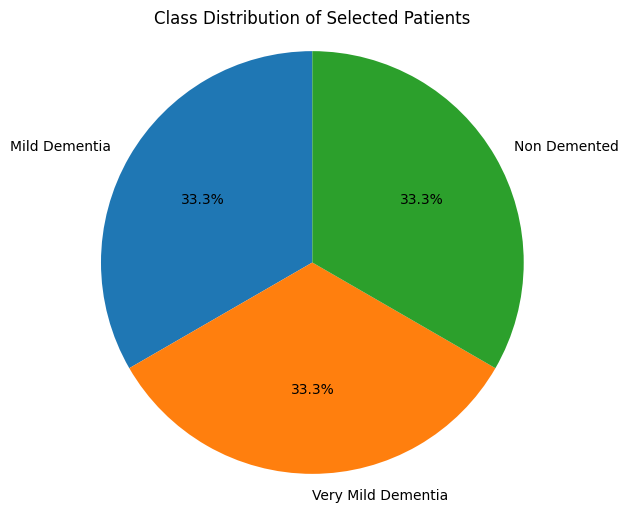

In [ ]:
# Data Summary and Pie Chart

total_mild_images = count_total_images(mild_path)
total_vm_images = count_total_images(verymild_path)
total_nond_images = count_total_images(nondemented_path)

mild_counts_per_patient = count_images_per_patient(mild_path)
verymild_counts_per_patient = count_images_per_patient(verymild_path)
nond_counts_per_patient = count_images_per_patient(nondemented_path)

print("=========== Data Summary ===========\n")

print(f"Total Number of Patients: {n}")
print(f"Total Number of Images: {total_mild_images + total_vm_images + total_nond_images}\n")

print(f"Mild Dementia: {num_mild_patients} patients with {total_mild_images} images. Percentage: {num_mild_images:.2f}%")
for patient_id, count in mild_counts_per_patient.items():
    print(f"{patient_id}: {count} images")

print(f"\nVery Mild Dementia: {num_verymild_patients} patients with {total_vm_images} images. Percentage: {num_verymild_images:.2f}%")
for patient_id, count in verymild_counts_per_patient.items():
    print(f"{patient_id}: {count} images")

print(f"\nNon Demented: {num_nondemented_patients} patients with {total_nond_images} images. Percentage: {num_nondemented_images:.2f}%")
for patient_id, count in nond_counts_per_patient.items():
    print(f"{patient_id}: {count} images")


print(f"===================================================== {'\n' * 2}")

# Pie Chart

labels = ['Mild Dementia', 'Very Mild Dementia', 'Non Demented']
sizes = [num_mild_images, num_verymild_images, num_nondemented_images]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution of Selected Patients')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()



In [ ]:
# Data Preprocessing - Cropping images
# 1) Convert background to Gray
# 2) GaussianBlur
# 3) Threshold
# 4) Erode
# 5) Dilate
# 6) Find Contours

In [ ]:
# Data Preprocessing - Cropping Image


def crop_brain_contour(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    #Convert to Gray
    gray = cv2.GaussianBlur(gray, (5, 5), 0)          # (5,5) Kernel Size ; 0 - sigma (standard Deviation) OpenCV automatically chooses a good sigma value based on the kernel size.

    thres = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)[1]   # <45 becomes black ; >= 45 becomes white ; ThreshBinary because where converting it to Gray ; choosing only 1st pixels
    kernel = np.ones((5, 5), np.uint8)
    thres = cv2.erode(thres, kernel, iterations=2)
    thres = cv2.dilate(thres, kernel, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if len(cnts) == 0:
        return image

    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])    #Top
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])    #Bottom
    extBot = tuple(c[c[:,:,1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    #print(new_image)

    if plot:                    # if plot = TRUE
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image




Sample Image from Mild Dementia patient OAS1_0382 image #160 



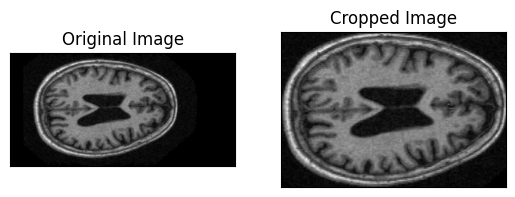

array([[[ 4,  4,  4],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 7,  7,  7],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
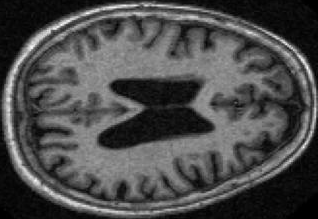

In [ ]:
img1 = cv2.imread('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_MildDementia/OAS1_0382/OAS1_0382_MR1_mpr-4_160.jpg')
#print(img1)

print("Sample Image from Mild Dementia patient OAS1_0382 image #160 \n")
crop_brain_contour(img1, True)




Sample Image from Very Mild Dementia patient OAS1_0374 image #159 



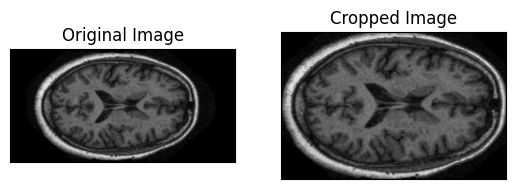

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
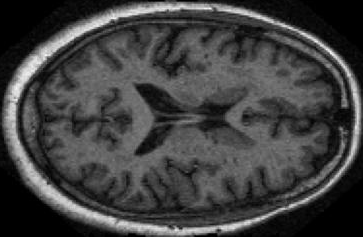

In [ ]:
img2 = cv2.imread('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_VeryMildDementia/OAS1_0374/OAS1_0374_MR1_mpr-4_159.jpg')

print("\n\nSample Image from Very Mild Dementia patient OAS1_0374 image #159 \n")
crop_brain_contour(img2, True)



Sample Image from Non Demented patient OAS1_0350 image #158 



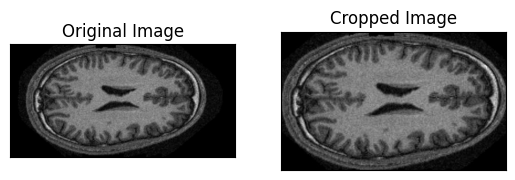

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
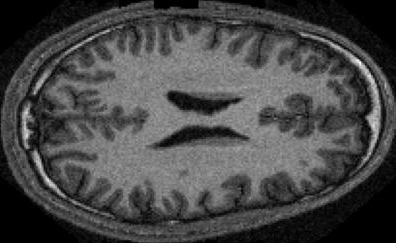

In [ ]:
img3 = cv2.imread('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_NonDemented/OAS1_0350/OAS1_0350_MR1_mpr-4_158.jpg')

print("\n\nSample Image from Non Demented patient OAS1_0350 image #158 \n")
crop_brain_contour(img3, plot = True)

In [ ]:
# Cropping and saving processed Images per Patient

def process_and_save(dir_list, image_size, output_base):
    image_width, image_height = image_size

    for directory, label in dir_list.items():
        print("\nProcessing class folder:", directory)

        # class_name will be: Selected_MildDementia, Selected_VeryMildDementia, etc.
        class_name = os.path.basename(directory)

        for patient_id in os.listdir(directory):
            patient_folder = os.path.join(directory, patient_id)
            # if not os.path.isdir(patient_folder):
            #     continue  # skip weird files

            # Create output folder per CLASS + PATIENT
            # /content/ProcessedImages/Selected_MildDementia/OAS1_0001
            output_patient_dir = os.path.join(output_base, class_name, patient_id)
            os.makedirs(output_patient_dir, exist_ok=True)

            for filename in os.listdir(patient_folder):
                image_path = os.path.join(patient_folder, filename)

                image = cv2.imread(image_path)
                if image is None:
                    print("Skipped (cannot read):", image_path)
                    continue

                # crop brain
                image = crop_brain_contour(image, plot=False)
                if image is None or image.size == 0:
                    print("Skipped (bad crop):", image_path)
                    continue

                # resize
                image = cv2.resize(image, (image_width, image_height),
                                   interpolation=cv2.INTER_CUBIC)

                # save to patient-specific folder
                save_path = os.path.join(output_patient_dir, filename)
                cv2.imwrite(save_path, image)

        print("Done with:", class_name)

In [ ]:
# !!!!!!!!! =====  PLEASE DO NOT RUN THIS CODES ===== !!!!!!

# Make Processed Folders
output_base = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages"
os.makedirs(output_base, exist_ok=True)

#Paths
mild_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_MildDementia'
verymild_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_VeryMildDementia'
nondemented_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_NonDemented'
selected_path = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages'

image_width, image_height = 240, 240

dir_list = {
    mild_path: 0,
    verymild_path: 1,
    nondemented_path: 2
}

process_and_save(dir_list, (image_width, image_height), output_base)



Processing class folder: /content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_MildDementia
Done with: Selected_MildDementia

Processing class folder: /content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_VeryMildDementia
Done with: Selected_VeryMildDementia

Processing class folder: /content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/Selected_NonDemented
Done with: Selected_NonDemented


In [ ]:
#Show Class Shape; pick 1 image per class

def show_class_shape(class_path, class_name):
    for patient_id in os.listdir(class_path):
        patient_folder = os.path.join(class_path, patient_id)

        # get one image from this patient
        for filename in os.listdir(patient_folder):
          img_path = os.path.join(patient_folder, filename)
          img = cv2.imread(img_path)

          print(f"{class_name} = {img.shape}")
          return  # stop after first valid image

In [ ]:
# Data Summary Processed Images

processed_mild = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/Selected_MildDementia"
processed_verymild = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/Selected_VeryMildDementia"
processed_nondemented = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/Selected_NonDemented"

ptotal_mild_images = count_total_images(processed_mild)
ptotal_vm_images = count_total_images(processed_verymild)
ptotal_nond_images = count_total_images(processed_nondemented)

pmild_counts_per_patient = count_images_per_patient(processed_mild)
pverymild_counts_per_patient = count_images_per_patient(processed_verymild)
pnond_counts_per_patient = count_images_per_patient(processed_nondemented)

print("=========== Data Summary - Processed Images ===========\n")

print(f"Total Number of Patients: {len(os.listdir(processed_mild) + os.listdir(processed_verymild) + os.listdir(processed_nondemented))}")
print(f"Total Number of Images: {ptotal_mild_images + ptotal_vm_images + ptotal_nond_images}\n")

print(f"Mild Dementia: {len(os.listdir(mild_path))} patients with {ptotal_mild_images} images.")
show_class_shape(processed_mild, "Mild Dementia")
# for patient_id, count in pmild_counts_per_patient.items():
#     print(f"{patient_id}: {count} images")

print(f"\nVery Mild Dementia: {len(os.listdir(verymild_path))} patients with {ptotal_vm_images} images.")
show_class_shape(processed_verymild, "Very Mild Dementia")
# for patient_id, count in pverymild_counts_per_patient.items():
#     print(f"{patient_id}: {count} images")

print(f"\nNon Demented: {len(os.listdir(nondemented_path))} patients with {ptotal_nond_images} images.")
show_class_shape(processed_nondemented, "Non Demented")
# for patient_id, count in pnond_counts_per_patient.items():
#     print(f"{patient_id}: {count} images")


=========== Data Summary - Processed Images ===========

Total Number of Patients: 63
Total Number of Images: 15067

Mild Dementia: 21 patients with 5002 images.
Mild Dementia = (240, 240, 3)

Very Mild Dementia: 21 patients with 5063 images.
Very Mild Dementia = (240, 240, 3)

Non Demented: 21 patients with 5002 images.
Non Demented = (240, 240, 3)


In [ ]:
# Plotting Sample Cropped Images


def show_random_images_per_class(class_path, class_name, crop=True, num_images=20):
    # Get patient folders
    patient_folders = [
        os.path.join(class_path, p)
        for p in os.listdir(class_path)
        if os.path.isdir(os.path.join(class_path, p))
    ]

    # Randomly choose N patient folders
    selected_patients = random.sample(patient_folders, num_images)

    plt.figure(figsize=(8, 8))
    plt.suptitle(f"\n\nRandom {num_images} Images from {class_name}\n\n\n", fontsize=16)

    for i, patient_folder in enumerate(selected_patients):
        # Get all images in that patient folder
        all_imgs = [
            os.path.join(patient_folder, f)
            for f in os.listdir(patient_folder)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ]
        if not all_imgs:
            continue

        # Pick 1 random image from this patient
        img_path = random.choice(all_imgs)
        img = cv2.imread(img_path)

        # convert to display format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(4, 5, i + 1)  # 20 images = 4 rows × 5 columns
        plt.imshow(img)
        plt.title(os.path.basename(patient_folder))
        plt.axis("off")

    plt.show()

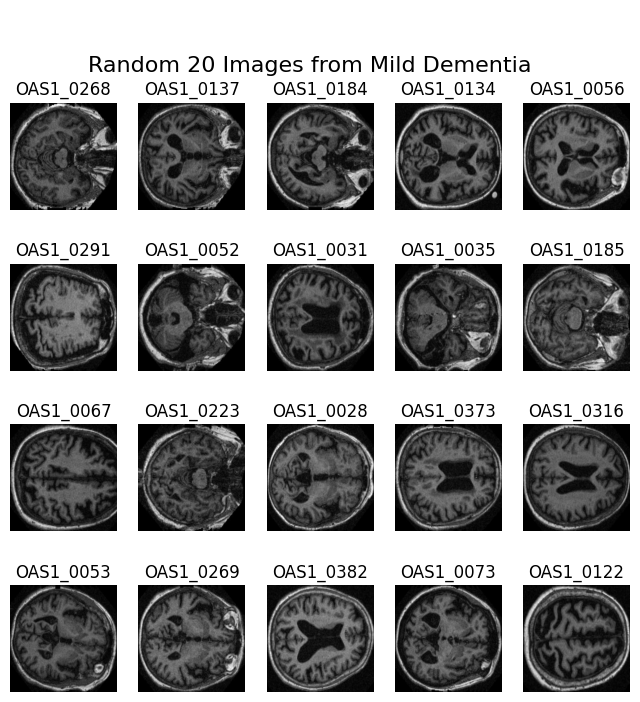

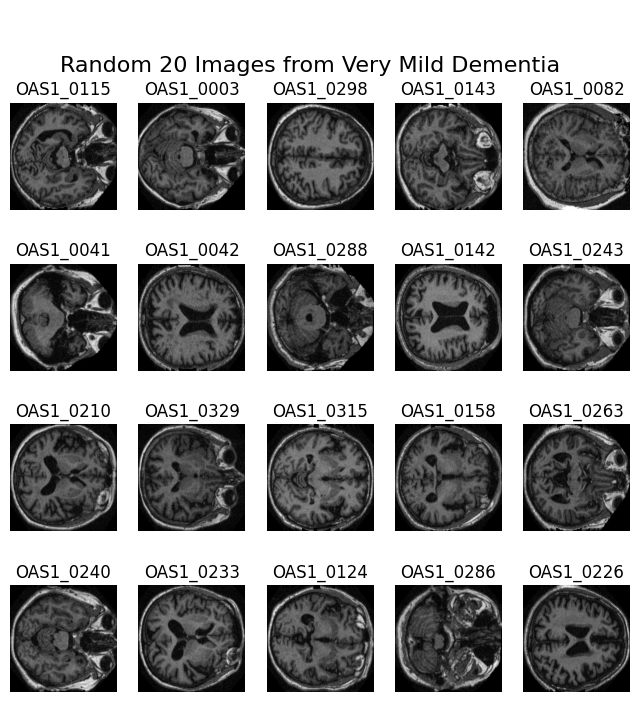

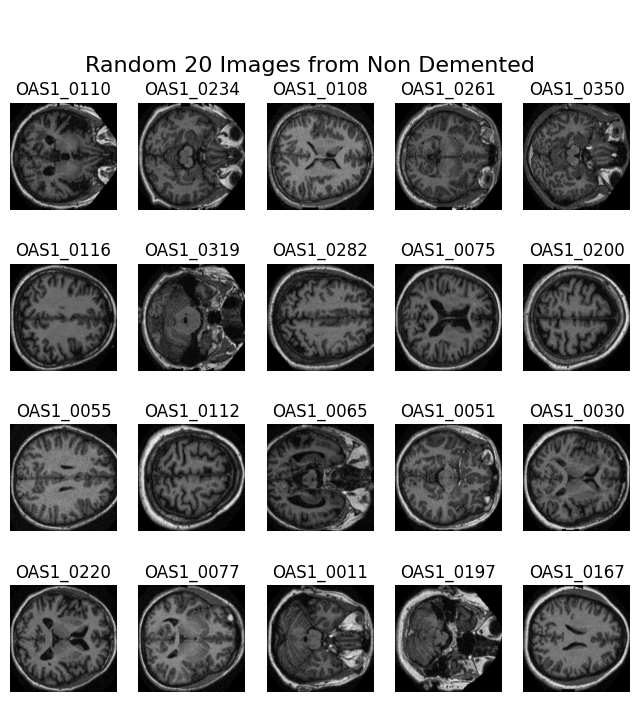

In [ ]:
# Showing Cropped Sample Images

show_random_images_per_class(
    processed_mild,
    "Mild Dementia",
    crop=True,
    num_images=20
)

show_random_images_per_class(
    processed_verymild,
    "Very Mild Dementia",
    crop=True,
    num_images=20
)

show_random_images_per_class(
    processed_nondemented,
    "Non Demented",
    crop=True,
    num_images=20
)

In [ ]:
# ==================  Data Splitting =========================

In [ ]:
# Creating Folders for Train, Test, and Validation

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting'):
  base_dir = ('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting')
  os.mkdir(base_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/train'):
  train_dir = os.path.join(base_dir, 'train')
  os.mkdir(train_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/test'):
  test_dir = os.path.join(base_dir, 'test')
  os.mkdir(test_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/val'):
  val_dir = os.path.join(base_dir, 'val')
  os.mkdir(val_dir)


In [ ]:
# Creating SubFolders for MIld, Very Mild, and Non Demented

# Mild folders
if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/train/MildDementia'):
  mild_train_dir = os.path.join(train_dir, 'MildDementia')
  os.mkdir(mild_train_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/test/MildDementia'):
  mild_test_dir = os.path.join(test_dir, 'MildDementia')
  os.mkdir(mild_test_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/val/MildDementia'):
  mild_val_dir = os.path.join(val_dir, 'MildDementia')
  os.mkdir(mild_val_dir)

# Very Mild folders
if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/train/VeryMildDementia'):
  verymild_train_dir = os.path.join(train_dir, 'VeryMildDementia')
  os.mkdir(verymild_train_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/test/VeryMildDementia'):
  verymild_test_dir = os.path.join(test_dir, 'VeryMildDementia')
  os.mkdir(verymild_test_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/val/VeryMildDementia'):
  verymild_val_dir = os.path.join(val_dir, 'VeryMildDementia')
  os.mkdir(verymild_val_dir)

# Non Demented folders
if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/train/NonDemented'):
  nondemented_train_dir = os.path.join(train_dir, 'NonDemented')
  os.mkdir(nondemented_train_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/test/NonDemented'):
  nondemented_test_dir = os.path.join(test_dir, 'NonDemented')
  os.mkdir(nondemented_test_dir)

if not os.path.isdir('/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/val/NonDemented'):
  nondemented_val_dir = os.path.join(val_dir, 'NonDemented')
  os.mkdir(nondemented_val_dir)



In [ ]:
# Read images from Processed Folder
# Shuffle it
# Splits Patients 70/15/15
# Copy images to train/val/test folders

import shutil


def split_by_patient(src_dir, train_dir, val_dir, test_dir,
                     train_ratio, val_ratio, seed, move=False):

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Get all patient folders
    patients = [
        p for p in os.listdir(src_dir)
        if os.path.isdir(os.path.join(src_dir, p))
    ]

    random.seed(seed)
    random.shuffle(patients)

    n_total = len(patients)         # Calculations for train/test/val
    n_train = int(n_total * train_ratio)
    n_val   = int(n_total * val_ratio)
    n_test  = n_total - n_train - n_val

    train_patients = patients[:n_train]      # Ex: images[a:b] start at index a : stop BEFORE index B
    val_patients   = patients[n_train:n_train + n_val]
    test_patients  = patients[n_train + n_val:]    # start at the sum of n_train + n_val : until it ends

    def transfer(p_list, dest_root):
        for patient in p_list:
            src = os.path.join(src_dir, patient)
            dest = os.path.join(dest_root, patient)

            if move:
                shutil.move(src, dest)
            else:
                shutil.copytree(src, dest)

    transfer(train_patients, train_dir)
    transfer(val_patients,   val_dir)
    transfer(test_patients,  test_dir)

    print(f"\nClass: {os.path.basename(src_dir)}")
    print(f"Patients total: {n_total}")
    print(f" → Train: {len(train_patients)} patients")   # Alt + 26 = →
    print(f" → Val:   {len(val_patients)} patients")
    print(f" → Test:  {len(test_patients)} patients")

In [ ]:
# !!!!!!!!! =====  PLEASE DO NOT RUN THIS CODES ===== !!!!!!
# Splitting images to Train/Val/Test ; 70/15/15

processed_mild = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/Selected_MildDementia"
processed_verymild = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/Selected_VeryMildDementia"
processed_nondemented = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/Selected_NonDemented"

mild_train_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/train/MildDementia'
mild_val_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/val/MildDementia'
mild_test_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/test/MildDementia'

verymild_train_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/train/VeryMildDementia'
verymild_val_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/val/VeryMildDementia'
verymild_test_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/test/VeryMildDementia'

nondemented_train_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/train/NonDemented'
nondemented_val_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/val/NonDemented'
nondemented_test_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting/test/NonDemented'


# Mild Dementia
split_by_patient(
    src_dir=processed_mild,
    train_dir=mild_train_dir,
    val_dir=mild_val_dir,
    test_dir=mild_test_dir,
    train_ratio=0.7,
    val_ratio=0.15,
    seed=42,
    move=False   # set to True if want to MOVE instead of COPY ; Leave it as False
)

# Very Mild Dementia
split_by_patient(
    src_dir=processed_verymild,
    train_dir=verymild_train_dir,
    val_dir=verymild_val_dir,
    test_dir=verymild_test_dir,
    train_ratio=0.7,
    val_ratio=0.15,
    seed=42,
    move=False
)

# Non Demented
split_by_patient(
    src_dir=processed_nondemented,
    train_dir=nondemented_train_dir,
    val_dir=nondemented_val_dir,
    test_dir=nondemented_test_dir,
    train_ratio=0.7,
    val_ratio=0.15,
    seed=42,
    move=False
)


Class: Selected_MildDementia
Patients total: 21
 → Train: 14 patients
 → Val:   3 patients
 → Test:  4 patients

Class: Selected_VeryMildDementia
Patients total: 21
 → Train: 14 patients
 → Val:   3 patients
 → Test:  4 patients

Class: Selected_NonDemented
Patients total: 21
 → Train: 14 patients
 → Val:   3 patients
 → Test:  4 patients


In [ ]:
# CNN-LTSM (Low Accuracy - Not included in the report)

IMAGE_SIZE = (240, 240)
BATCH_SIZE = 16
NUM_CLASSES = 3

base_split_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting'

train_dir = base_split_dir + '/train'
val_dir   = base_split_dir + '/val'
test_dir  = base_split_dir + '/test'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 10065 files belonging to 3 classes.
Found 2196 files belonging to 3 classes.
Found 2806 files belonging to 3 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# basic augmentation (helps generalization → better test accuracy)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

train_ds = (
    train_ds
    .map(lambda x, y: (data_augmentation(x, training=True), y),
         num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

In [ ]:
def build_cnn_lstm_model(input_shape=(240, 240, 3), num_classes=3):
    inputs = layers.Input(shape=input_shape)

    # normalize pixels
    x = layers.Rescaling(1./255)(inputs)

    # ---- CNN feature extractor ----
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   # 240 -> 120

    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   # 120 -> 60

    x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   # 60 -> 30

    # Now feature map is ~ (30, 30, 128)
    # ---- Reshape spatial map as a sequence ----
    x = layers.Reshape((30 * 30, 128))(x)   # (time_steps=900, features=128)

    # ---- LSTM over this sequence ----
    x = layers.Bidirectional(
        layers.LSTM(128, dropout=0.3, return_sequences=False)
    )(x)

    # ---- Classification head ----
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs, name="cnn_lstm_spatial")

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"]
    )

    return model

cnn_lstm_model = build_cnn_lstm_model(input_shape=(*IMAGE_SIZE, 3),
                                      num_classes=NUM_CLASSES)

cnn_lstm_model.summary()

Model: "cnn_lstm_spatial"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 240, 240, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 240, 240, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 120, 120, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 900, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,595 (1.49 MB)

 Trainable params: 390,147 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',      # what to watch
    patience=5,              # stop if no improvement for 5 epochs
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',      # when val_loss plateaus…
    factor=0.2,              # lr = lr * 0.2
    patience=3,              # wait 3 epochs with no improvement
    min_lr=1e-6,
    verbose=1
)

EPOCHS = 50  # can set higher, early stopping will cut it short

history = cnn_lstm_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop, lr_scheduler]
)


Epoch 1/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 788s 1s/step - accuracy: 0.3376 - loss: 1.1290 - val_accuracy: 0.2782 - val_loss: 1.1180 - learning_rate: 3.0000e-04
Epoch 2/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 86s 136ms/step - accuracy: 0.3622 - loss: 1.0957 - val_accuracy: 0.2272 - val_loss: 1.2395 - learning_rate: 3.0000e-04
Epoch 3/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 85s 134ms/step - accuracy: 0.3929 - loss: 1.0787 - val_accuracy: 0.2628 - val_loss: 1.2757 - learning_rate: 3.0000e-04
Epoch 4/50
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.4284 - loss: 1.0534
Epoch 4: ReduceLROnPlateau reducing learning rate to 6.000000284984708e-05.
630/630 ━━━━━━━━━━━━━━━━━━━━ 85s 134ms/step - accuracy: 0.4285 - loss: 1.0534 - val_accuracy: 0.4253 - val_loss: 1.2851 - learning_rate: 3.0000e-04
Epoch 5/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 85s 134ms/step - accuracy: 0.4806 - loss: 0.9936 - val_accuracy: 0.5442 - val_loss: 1.3023 - learning_rate: 6.0000e-05
Epoch 6/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 85s 134ms/step

In [ ]:
test_loss, test_acc = cnn_lstm_model.evaluate(test_ds)
print("Test accuracy:", test_acc)

176/176 ━━━━━━━━━━━━━━━━━━━━ 175s 996ms/step - accuracy: 0.2894 - loss: 1.0719
Test accuracy: 0.35495367646217346


In [ ]:
# =================================================================================================================================================================== #

In [ ]:
# VGG19 (Fairly high Accuracy - Included in the Report)

IMAGE_SIZE = (240, 240)
BATCH_SIZE = 16
NUM_CLASSES = 3

base_split_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting'

train_dir = base_split_dir + '/train'
val_dir   = base_split_dir + '/val'
test_dir  = base_split_dir + '/test'

# image_dataset_from_directory outputs (images, labels) ; in this case we labelled them as integers

train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',         # assigns labels automatically; class0 → 0
    label_mode='int',          # 0,1,2
    image_size=IMAGE_SIZE,     # # every image is resized
    batch_size=BATCH_SIZE,
    shuffle=True,              # Randomizes image order every epoch → prevents memorizing order.
    seed=42
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)



Found 10065 files belonging to 3 classes.
Found 2196 files belonging to 3 classes.
Found 2806 files belonging to 3 classes.


In [ ]:
train_count = sum([len(files) for r, d, files in os.walk(train_dir)])
val_count   = sum([len(files) for r, d, files in os.walk(val_dir)])
test_count  = sum([len(files) for r, d, files in os.walk(test_dir)])

print("Train image count:", train_count)
print("Val image count:", val_count)
print("Test image count:", test_count)

Train image count: 10065
Val image count: 2196
Test image count: 2806


In [ ]:
# Autotune for speed: prepare the next batch of data while the GPU is training on the current batch, called prefetching

AUTOTUNE = tf.data.AUTOTUNE

train_ds = (train_ds_raw
            .cache()
            .shuffle(1000)
            .prefetch(AUTOTUNE))

val_ds = (val_ds_raw
          .cache()
          .prefetch(AUTOTUNE))

test_ds = (test_ds_raw
           .cache()
           .prefetch(AUTOTUNE))

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.applications import DenseNet121

IMAGE_SIZE = (240, 240)
NUM_CLASSES = 3

# --- Base model ---
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
)

# Unfreeze last conv block
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

# --- Data augmentation ---
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # usually no need vertical for brain
    tf.keras.layers.RandomRotation(10/360),
    tf.keras.layers.RandomTranslation(0.05, 0.05),
    tf.keras.layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
], name="data_augmentation")

# --- Build model ---
inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

x = data_augmentation(inputs)   # augment only in training
x = preprocess_input(x)         # VGG19-specific preprocessing
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(128, activation='relu',  kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs, outputs)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 240, 240,  │          0 │ input_layer_4[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 240, 240,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 240, 240,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet121         │ (None, 7, 7,      │  7,037,504 │ add_1[0][0]       │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ densenet121[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    131,200 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 3)         │        387 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,173,187 (27.36 MB)

 Trainable params: 172,547 (674.01 KB)

 Non-trainable params: 7,000,640 (26.71 MB)

In [ ]:
# --- Compile ---

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# ============================
# 7. Train – Phase 1 (frozen)
# ============================
EPOCHS_PHASE1 = 20

history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE1,
    callbacks=[early_stop, reduce_lr]
)

# ============================
# 8. Fine-tune – unfreeze last few VGG19 layers
# ============================
base_model.trainable = True
for layer in base_model.layers[:-8]:   # last 8 layers trainable
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS_PHASE2 = 20

history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE2,
    callbacks=[early_stop, reduce_lr]
)




Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 462s 314ms/step - accuracy: 0.3740 - loss: 1.3994 - val_accuracy: 0.3561 - val_loss: 1.6882 - learning_rate: 1.0000e-05
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 65s 103ms/step - accuracy: 0.4369 - loss: 1.2248 - val_accuracy: 0.3588 - val_loss: 1.6997 - learning_rate: 1.0000e-05
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 65s 103ms/step - accuracy: 0.4842 - loss: 1.1246 - val_accuracy: 0.4153 - val_loss: 1.4732 - learning_rate: 1.0000e-05
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 65s 103ms/step - accuracy: 0.4972 - loss: 1.0959 - val_accuracy: 0.4540 - val_loss: 1.3524 - learning_rate: 1.0000e-05
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 65s 102ms/step - accuracy: 0.5314 - loss: 1.0239 - val_accuracy: 0.4909 - val_loss: 1.2834 - learning_rate: 1.0000e-05
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 65s 102ms/step - accuracy: 0.5450 - loss: 0.9881 - val_accuracy: 0.5241 - val_loss: 1.1909 - learning_rate: 1.0000e-05
Epoch 7/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 64s 1

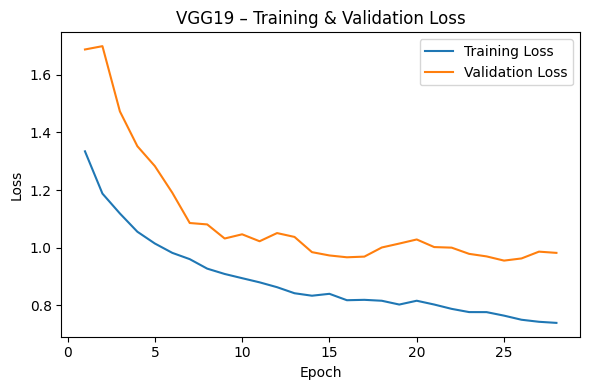

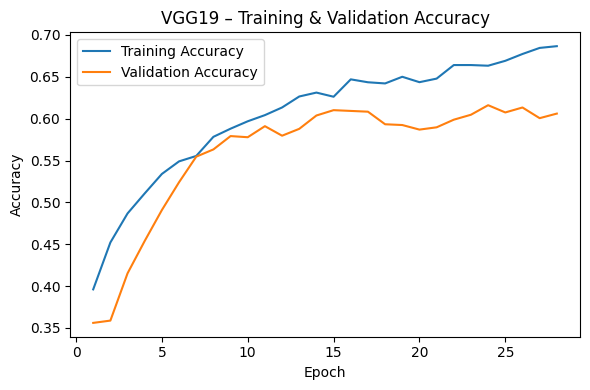

In [ ]:
# ============================
# 9. Combine histories & plot curves
# ============================
def plot_history(histories, title_prefix="VGG19"):
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for h in histories:
        acc += h.history.get('accuracy', [])
        val_acc += h.history.get('val_accuracy', [])
        loss += h.history.get('loss', [])
        val_loss += h.history.get('val_loss', [])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(6,4))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title_prefix} – Training & Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title_prefix} – Training & Validation Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history([history1, history2], title_prefix="VGG19")

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.4168 - loss: 1.6166
Test Accuracy: 49.96%
Test Loss: 1.2618


In [ ]:
test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = test_ds_raw.class_names
print(class_names)

test_ds = test_ds_raw.prefetch(tf.data.AUTOTUNE)

Found 2806 files belonging to 3 classes.
['MildDementia', 'NonDemented', 'VeryMildDementia']


Confusion Matrix:
 [[320 385 210]
 [ 81 716 179]
 [166 383 366]]

Classification Report:
                  precision    recall  f1-score   support

    MildDementia       0.56      0.35      0.43       915
     NonDemented       0.48      0.73      0.58       976
VeryMildDementia       0.48      0.40      0.44       915

        accuracy                           0.50      2806
       macro avg       0.51      0.49      0.48      2806
    weighted avg       0.51      0.50      0.49      2806



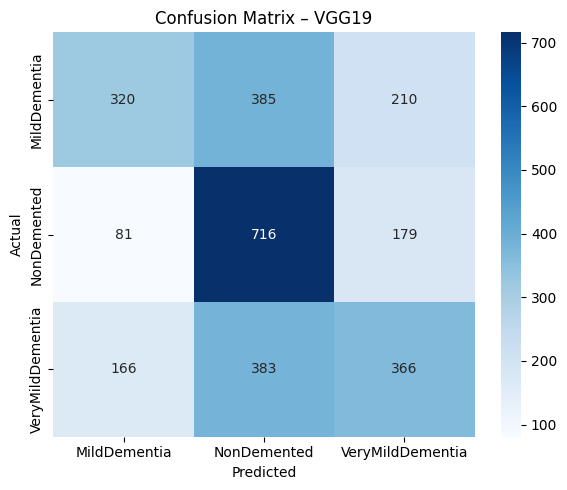

In [ ]:
# ============================
# 11. Confusion matrix + report
# ============================
y_true = np.concatenate([y.numpy() for _, y in test_ds])

y_pred_proba = model.predict(test_ds, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – VGG19")
plt.tight_layout()
plt.show()

In [ ]:
# =================================================================================================================================================================== #

In [ ]:
#CNN UNET ver 2 (Fairly High Accuracy - Included in the Report)

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# --- Config ---
IMAGE_SIZE = (240, 240)
BATCH_SIZE = 16
NUM_CLASSES = 3

base_split_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting'

train_dir = base_split_dir + '/train'
val_dir   = base_split_dir + '/val'
test_dir  = base_split_dir + '/test'

# --- Datasets from folders ---
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds_raw.class_names
print("Classes:", class_names)

# --- Prefetch / cache like before ---
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    train_ds_raw
    .cache()
    .shuffle(1000)
    .prefetch(AUTOTUNE)
)

val_ds = (
    val_ds_raw
    .cache()
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds_raw
    .cache()
    .prefetch(AUTOTUNE)
)

Found 10065 files belonging to 3 classes.
Found 2196 files belonging to 3 classes.
Found 2806 files belonging to 3 classes.
Classes: ['MildDementia', 'NonDemented', 'VeryMildDementia']


In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(10/360),
        layers.RandomTranslation(0.05, 0.05),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
    ],
    name="data_augmentation"
)

In [ ]:
def conv_block(x, filters, name):
    x = layers.Conv2D(filters, 3, padding="same", kernel_initializer="he_normal",
                      kernel_regularizer=regularizers.l2(1e-4), name=name+"_conv1")(x)
    x = layers.BatchNormalization(name=name+"_bn1")(x)
    x = layers.Activation("relu", name=name+"_relu1")(x)

    x = layers.Conv2D(filters, 3, padding="same", kernel_initializer="he_normal",
                      kernel_regularizer=regularizers.l2(1e-4), name=name+"_conv2")(x)
    x = layers.BatchNormalization(name=name+"_bn2")(x)
    x = layers.Activation("relu", name=name+"_relu2")(x)
    x = layers.Dropout(0.3)(x)
    return x

def up_block(x, skip, filters, name):
    x = layers.Conv2DTranspose(filters, 2, strides=2, padding="same", name=name+"_up")(x)
    x = layers.Concatenate(name=name+"_concat")([x, skip])
    x = conv_block(x, filters, name=name+"_conv")
    return x

def build_unet_classifier(input_shape=(240, 240, 3), num_classes=3):
    inputs = layers.Input(shape=input_shape)

    # augment only in training
    x = data_augmentation(inputs)

    # Encoder
    c1 = conv_block(x,   64, "enc1")
    p1 = layers.MaxPooling2D((2, 2), name="pool1")(c1)

    c2 = conv_block(p1, 128, "enc2")
    p2 = layers.MaxPooling2D((2, 2), name="pool2")(c2)

    c3 = conv_block(p2, 256, "enc3")
    p3 = layers.MaxPooling2D((2, 2), name="pool3")(c3)

    c4 = conv_block(p3, 512, "enc4")
    p4 = layers.MaxPooling2D((2, 2), name="pool4")(c4)

    # Bottleneck
    bn = conv_block(p4, 1024, "bottleneck")

    # Decoder
    u4 = up_block(bn, c4, 512, "dec4")
    u3 = up_block(u4, c3, 256, "dec3")
    u2 = up_block(u3, c2, 128, "dec2")
    u1 = up_block(u2, c1, 64,  "dec1")

    # For segmentation you’d put a Conv2D(num_classes, 1, activation='softmax') here.
    # For classification we global-pool and add a Dense.
    x = layers.GlobalAveragePooling2D(name="gap")(u1)
    x = layers.BatchNormalization(name="cls_bn")(x)
    x = layers.Dropout(0.5, name="cls_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="cls_head")(x)

    model = models.Model(inputs, outputs, name="UNet_classifier")
    return model

model = build_unet_classifier(
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    num_classes=NUM_CLASSES
)

model.summary()

Model: "UNet_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 240, 240,  │          0 │ input_layer[0][0] │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_conv1 (Conv2D) │ (None, 240, 240,  │      1,792 │ data_augmentatio… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_bn1            │ (None, 240, 240,  │        256 │ enc1_conv1[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_relu1          │ (None, 240, 240,  │          0 │ enc1_bn1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_conv2 (Conv2D) │ (None, 240, 240,  │     36,928 │ enc1_relu1[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_bn2            │ (None, 240, 240,  │        256 │ enc1_conv2[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_relu2          │ (None, 240, 240,  │          0 │ enc1_bn2[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 240, 240,  │          0 │ enc1_relu2[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 120, 120,  │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_conv1 (Conv2D) │ (None, 120, 120,  │     73,856 │ pool1[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_bn1            │ (None, 120, 120,  │        512 │ enc2_conv1[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_relu1          │ (None, 120, 120,  │          0 │ enc2_bn1[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_conv2 (Conv2D) │ (None, 120, 120,  │    147,584 │ enc2_relu1[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_bn2            │ (None, 120, 120,  │        512 │ enc2_conv2[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_relu2          │ (None, 120, 120,  │          0 │ enc2_bn2[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 120, 120,  │          0 │ enc2_relu2[0][0]

 Total params: 31,055,683 (118.47 MB)

 Trainable params: 31,043,779 (118.42 MB)

 Non-trainable params: 11,904 (46.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_unet.h5",
    monitor='val_loss',
    save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)




Epoch 1/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4846 - loss: 2.2665

630/630 ━━━━━━━━━━━━━━━━━━━━ 1351s 1s/step - accuracy: 0.4847 - loss: 2.2662 - val_accuracy: 0.4663 - val_loss: 4.9076 - learning_rate: 1.0000e-04
Epoch 2/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7089 - loss: 1.6793

630/630 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.7090 - loss: 1.6792 - val_accuracy: 0.4982 - val_loss: 4.5678 - learning_rate: 1.0000e-04
Epoch 3/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.8113 - loss: 1.3108 - val_accuracy: 0.3912 - val_loss: 5.1812 - learning_rate: 1.0000e-04
Epoch 4/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.8794 - loss: 1.0708 - val_accuracy: 0.3333 - val_loss: 7.2916 - learning_rate: 1.0000e-04
Epoch 5/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.9338 - loss: 0.8821 - val_accuracy: 0.3333 - val_loss: 8.9841 - learning_rate: 5.0000e-05
Epoch 6/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9508 - loss: 0.7926

630/630 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.9507 - loss: 0.7926 - val_accuracy: 0.5159 - val_loss: 2.8538 - learning_rate: 5.0000e-05
Epoch 7/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 739s 1s/step - accuracy: 0.9512 - loss: 0.7521 - val_accuracy: 0.5182 - val_loss: 3.2519 - learning_rate: 5.0000e-05
Epoch 8/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 739s 1s/step - accuracy: 0.9596 - loss: 0.7171 - val_accuracy: 0.4950 - val_loss: 3.3904 - learning_rate: 5.0000e-05
Epoch 9/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.9787 - loss: 0.6487 - val_accuracy: 0.4877 - val_loss: 3.6338 - learning_rate: 2.5000e-05
Epoch 10/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.9803 - loss: 0.6287 - val_accuracy: 0.3807 - val_loss: 7.0988 - learning_rate: 2.5000e-05
Epoch 11/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.9846 - loss: 0.6095 - val_accuracy: 0.4545 - val_loss: 3.4329 - learning_rate: 1.2500e-05


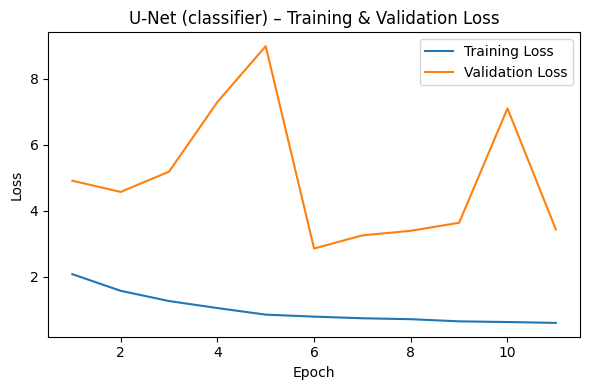

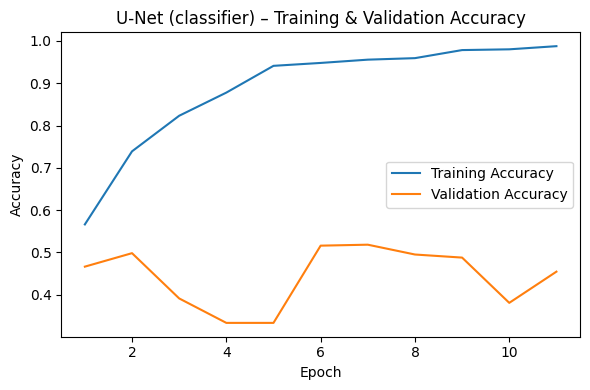

In [ ]:
def plot_history(history, title_prefix="UNet"):
    acc = history.history.get("accuracy", [])
    val_acc = history.history.get("val_accuracy", [])
    loss = history.history.get("loss", [])
    val_loss = history.history.get("val_loss", [])
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(6,4))
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} – Training & Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(epochs, acc, label="Training Accuracy")
    plt.plot(epochs, val_acc, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} – Training & Validation Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history, title_prefix="U-Net (classifier)")

176/176 ━━━━━━━━━━━━━━━━━━━━ 155s 878ms/step - accuracy: 0.7582 - loss: 1.5607
Test Accuracy: 51.46%
Test Loss: 3.1435
Confusion Matrix:
 [[819  13  83]
 [467 404 105]
 [640  54 221]]

Classification Report:
                  precision    recall  f1-score   support

    MildDementia       0.43      0.90      0.58       915
     NonDemented       0.86      0.41      0.56       976
VeryMildDementia       0.54      0.24      0.33       915

        accuracy                           0.51      2806
       macro avg       0.61      0.52      0.49      2806
    weighted avg       0.61      0.51      0.49      2806



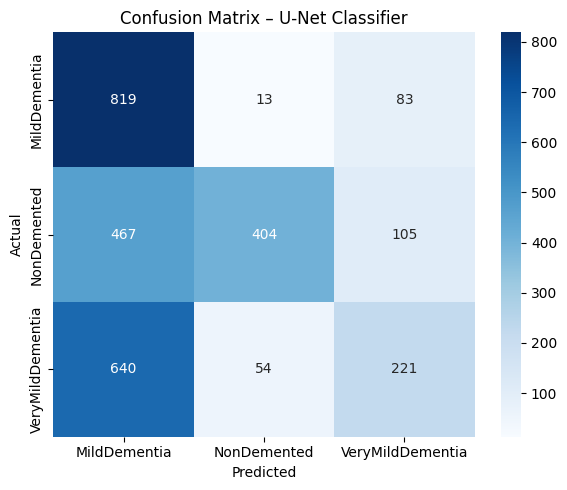

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# gather predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    probs = model.predict(images, verbose=0)
    preds = np.argmax(probs, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – U-Net Classifier")
plt.tight_layout()
plt.show()

In [ ]:
# =================================================================================================================================================================== #

In [ ]:
!pip install monai-weekly -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 58.5 MB/s eta 0:00:00


In [ ]:
#VGG19 PyTorch - using weight="Monai" ; it evaluates longer than expected. (Not included in the Report)

import os, glob, copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from monai.data import Dataset
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Resized, ScaleIntensityd,
    RandFlipd, RandRotated, RandAffined
)
from monai.networks.nets import DenseNet121
from sklearn.metrics import confusion_matrix, classification_report

# ----------------- paths -----------------
IMAGE_SIZE = (240, 240)
BATCH_SIZE = 16

base_split_dir = "/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting"
train_dir = os.path.join(base_split_dir, "train")
val_dir   = os.path.join(base_split_dir, "val")
test_dir  = os.path.join(base_split_dir, "test")

VALID_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff")

def make_datalist(root, split_name):
    classes = sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))])
    class_to_idx = {c: i for i, c in enumerate(classes)}
    data = []

    print(f"\n📂 {split_name} classes:", classes)
    for c in classes:
        c_dir = os.path.join(root, c)
        files = [
            f for f in glob.glob(os.path.join(c_dir, "**", "*"), recursive=True)
            if f.lower().endswith(VALID_EXTS)
        ]
        print(f"  - {c}: {len(files)} images")
        for f in files:
            data.append({"image": f, "label": class_to_idx[c]})
    print(f"➡ {split_name} total images: {len(data)}")
    return data, class_to_idx

train_files, class_to_idx = make_datalist(train_dir, "train")
val_files,   _            = make_datalist(val_dir,   "val")
test_files,  _            = make_datalist(test_dir,  "test")

print("\nSummary:")
print("  train_files:", len(train_files))
print("  val_files:  ", len(val_files))
print("  test_files: ", len(test_files))
print("  class_to_idx:", class_to_idx)

# ------------- MONAI transforms -------------
train_transforms = Compose([
    LoadImaged(keys="image"),
    EnsureChannelFirstd(keys="image"),
    Resized(keys="image", spatial_size=IMAGE_SIZE),
    ScaleIntensityd(keys="image"),
    RandFlipd(keys="image", spatial_axis=1, prob=0.5),
    RandRotated(keys="image", range_x=np.deg2rad(10), prob=0.5),
    RandAffined(
        keys="image",
        translate_range=(0.05, 0.05),
        scale_range=(0.1, 0.1),
        mode="bilinear",
        prob=0.5,
    ),
])

val_test_transforms = Compose([
    LoadImaged(keys="image"),
    EnsureChannelFirstd(keys="image"),
    Resized(keys="image", spatial_size=IMAGE_SIZE),
    ScaleIntensityd(keys="image"),
])

# ------------- datasets & loaders -------------
train_ds = Dataset(data=train_files, transform=train_transforms)
val_ds   = Dataset(data=val_files,   transform=val_test_transforms)
test_ds  = Dataset(data=test_files,  transform=val_test_transforms)

print("\nDataset sizes:")
print("  train_ds:", len(train_ds))
print("  val_ds:  ", len(val_ds))
print("  test_ds: ", len(test_ds))

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True,  num_workers=0)
val_loader   = DataLoader(val_ds,   batch_size=16, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_ds,  batch_size=16, shuffle=False, num_workers=0)


<frozen importlib._bootstrap_external>:1301: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.



📂 train classes: ['MildDementia', 'NonDemented', 'VeryMildDementia']
  - MildDementia: 3355 images
  - NonDemented: 3294 images
  - VeryMildDementia: 3416 images
➡ train total images: 10065

📂 val classes: ['MildDementia', 'NonDemented', 'VeryMildDementia']
  - MildDementia: 732 images
  - NonDemented: 732 images
  - VeryMildDementia: 732 images
➡ val total images: 2196

📂 test classes: ['MildDementia', 'NonDemented', 'VeryMildDementia']
  - MildDementia: 915 images
  - NonDemented: 976 images
  - VeryMildDementia: 915 images
➡ test total images: 2806

Summary:
  train_files: 10065
  val_files:   2196
  test_files:  2806
  class_to_idx: {'MildDementia': 0, 'NonDemented': 1, 'VeryMildDementia': 2}

Dataset sizes:
  train_ds: 10065
  val_ds:   2196
  test_ds:  2806


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

NUM_CLASSES = len(class_to_idx)
class_names = [None] * NUM_CLASSES
for name, idx in class_to_idx.items():
    class_names[idx] = name
print("Classes (idx → name):", list(enumerate(class_names)))

# detect channel count from a batch
batch = next(iter(train_loader))
IN_CHANNELS = batch["image"].shape[1]     # (B, C, H, W)
print("Detected in_channels:", IN_CHANNELS)

model = DenseNet121(
    spatial_dims=2,
    in_channels=IN_CHANNELS,
    out_channels=NUM_CLASSES,
    pretrained=True,
).to(device)

print(model)
criterion = nn.CrossEntropyLoss()


Device: cuda
Classes (idx → name): [(0, 'MildDementia'), (1, 'NonDemented'), (2, 'VeryMildDementia')]
Detected in_channels: 3
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 382MB/s]


DenseNet121(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (layers): Sequential(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (denselayer2): _DenseLayer(
        (layers): Sequential(
          (norm1): BatchN

In [ ]:
def train_one_epoch_with_progress(model, loader, optimizer, epoch, num_epochs, print_every=5):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    num_batches = len(loader)
    print(f"  [train] num_batches in loader: {num_batches}")

    for i, batch in enumerate(loader):
        if i == 0:
            print("  [train] got first batch")

        images = batch["image"].to(device, dtype=torch.float32)
        labels = batch["label"].to(device, dtype=torch.long)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        if (i + 1) % print_every == 0 or (i + 1) == num_batches:
            print(f"    [Epoch {epoch+1}/{num_epochs}] "
                  f"Batch {i+1}/{num_batches}  loss={loss.item():.4f}")

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


In [ ]:
@torch.no_grad()
def evaluate_epoch_with_progress(model, loader, epoch=None, num_epochs=None, print_every=20):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    num_batches = len(loader)

    for i, batch in enumerate(loader):
        images = batch["image"].to(device, dtype=torch.float32)
        labels = batch["label"].to(device, dtype=torch.long)

        outputs = model(images)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        if (i + 1) % print_every == 0 or (i + 1) == num_batches:
            prefix = f"[Val {epoch+1}/{num_epochs}]" if epoch is not None else "[Val]"
            print(f"{prefix} Batch {i+1}/{num_batches} loss={loss.item():.4f}")

    return running_loss / total, correct / total


In [ ]:
# ---- Phase 1: freeze most layers, train last N parameter tensors ----
for p in model.parameters():
    p.requires_grad = False

N_TENSORS_TO_TRAIN = 10
all_params = list(model.parameters())
for p in all_params[-N_TENSORS_TO_TRAIN:]:
    p.requires_grad = True

optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-4,
    weight_decay=1e-4,
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=2, min_lr=1e-6
)

EPOCHS_PHASE1 = 20   # you can increase later
patience = 3
best_val_loss = np.inf
patience_counter = 0

history1 = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(EPOCHS_PHASE1):
    print(f"\n===== Phase 1 – Epoch {epoch+1}/{EPOCHS_PHASE1} =====")
    train_loss, train_acc = train_one_epoch_with_progress(
        model, train_loader, optimizer, epoch, EPOCHS_PHASE1, print_every=50
    )
    print("  Running validation...")
    val_loss, val_acc = evaluate_epoch_with_progress(
        model, val_loader, epoch=epoch, num_epochs=EPOCHS_PHASE1
        )

    scheduler.step(val_loss)

    history1["train_loss"].append(train_loss)
    history1["val_loss"].append(val_loss)
    history1["train_acc"].append(train_acc)
    history1["val_acc"].append(val_acc)

    print(f"--> End Epoch {epoch+1}: "
          f"Train Loss {train_loss:.4f} Acc {train_acc:.4f} | "
          f"Val Loss {val_loss:.4f} Acc {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping (Phase 1).")
            break

model.load_state_dict(best_model_wts)


In [ ]:
# ---- Phase 2: fine-tune all layers ----
for p in model.parameters():
    p.requires_grad = True

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=1e-5,
    weight_decay=1e-4,
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=2, min_lr=1e-6
)

EPOCHS_PHASE2 = 20    # again, start small
patience = 3
best_val_loss = np.inf
patience_counter = 0

history2 = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(EPOCHS_PHASE2):
    print(f"\n===== Phase 2 – Epoch {epoch+1}/{EPOCHS_PHASE2} =====")
    train_loss, train_acc = train_one_epoch_with_progress(
        model, train_loader, optimizer, epoch, EPOCHS_PHASE2, print_every=50
    )
    print("  Running validation...")
    val_loss, val_acc = evaluate_epoch_with_progress(
        model, val_loader, epoch=epoch, num_epochs=EPOCHS_PHASE1
        )

    scheduler.step(val_loss)

    history2["train_loss"].append(train_loss)
    history2["val_loss"].append(val_loss)
    history2["train_acc"].append(train_acc)
    history2["val_acc"].append(val_acc)

    print(f"--> End Epoch {epoch+1}: "
          f"Train Loss {train_loss:.4f} Acc {train_acc:.4f} | "
          f"Val Loss {val_loss:.4f} Acc {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping (Phase 2).")
            break

model.load_state_dict(best_model_wts)


In [ ]:
@torch.no_grad()
def predict_all(model, loader):
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    for batch in loader:
        images = batch["image"].to(device, dtype=torch.float32)
        labels = batch["label"].cpu().numpy()

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_labels.append(labels)
        all_preds.append(preds)
        all_probs.append(probs)

    return (
        np.concatenate(all_labels),
        np.concatenate(all_preds),
        np.concatenate(all_probs),
    )

y_true, y_pred, y_prob = predict_all(model, test_loader)

test_acc = (y_true == y_pred).mean()
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – DenseNet121 (MONAI)")
plt.tight_layout()
plt.show()


In [ ]:
# =================================================================================================================================================================== #

In [ ]:
#DenseNet (Low Accuracy - Not included in the report)

from tensorflow.keras.applications import DenseNet121

IMAGE_SIZE = (240, 240)
NUM_CLASSES = 3

# --- Base model: DenseNet121 ---
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
)

# First train with backbone frozen
base_model.trainable = False

# --- Data augmentation ---
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(10/360),
    tf.keras.layers.RandomTranslation(0.05, 0.05),
    tf.keras.layers.RandomZoom(0.1),
], name="data_augmentation")

# --- Build model ---
inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

x = data_augmentation(inputs)
x = preprocess_input(x)      # DenseNet preprocessing

x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 240, 240,  │          0 │ input_layer_7[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_6          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_7          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_8          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_2 (Stack)     │ (None, 240, 240,  │          0 │ get_item_6[0][0], │
│                     │ 3)                │            │ get_item_7[0][0], │
│                     │                   │            │ get_item_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 240, 240,  │          0 │ stack_2[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet121         │ (None, 7, 7,      │  7,037,504 │ add_2[0][0]       │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ densenet121[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │    262,400 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 3)         │        771 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,304,771 (27.87 MB)

 Trainable params: 265,219 (1.01 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [ ]:
train_dir = base_split_dir + '/train'   # you already have this

classes = sorted(os.listdir(train_dir))
print("Classes:", classes)

counts = []
for cls in classes:
    cls_dir = os.path.join(train_dir, cls)
    n_files = len(os.listdir(cls_dir))  # because your images are directly under class dirs
    counts.append(n_files)

counts = np.array(counts)
total = counts.sum()

class_weight = {
    i: total / (len(counts) * counts[i])
    for i in range(len(counts))
}

print("Class counts:", counts)
print("Class weights:", class_weight)

Classes: ['MildDementia', 'NonDemented', 'VeryMildDementia']
Class counts: [14 14 14]
Class weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight,
)

Epoch 1/40
630/630 ━━━━━━━━━━━━━━━━━━━━ 660s 1s/step - accuracy: 0.4600 - loss: 1.1874 - val_accuracy: 0.4850 - val_loss: 1.2960 - learning_rate: 1.0000e-04
Epoch 2/40
630/630 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.6263 - loss: 0.8365 - val_accuracy: 0.5241 - val_loss: 1.4624 - learning_rate: 1.0000e-04
Epoch 3/40
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6913 - loss: 0.7252
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
630/630 ━━━━━━━━━━━━━━━━━━━━ 66s 104ms/step - accuracy: 0.6913 - loss: 0.7251 - val_accuracy: 0.5597 - val_loss: 1.4602 - learning_rate: 1.0000e-04
Epoch 4/40
630/630 ━━━━━━━━━━━━━━━━━━━━ 66s 104ms/step - accuracy: 0.7162 - loss: 0.6654 - val_accuracy: 0.5801 - val_loss: 1.2480 - learning_rate: 5.0000e-05
Epoch 5/40
630/630 ━━━━━━━━━━━━━━━━━━━━ 66s 104ms/step - accuracy: 0.7364 - loss: 0.6344 - val_accuracy: 0.5943 - val_loss: 1.2685 - learning_rate: 5.0000e-05
Epoch 6/40
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - 

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("DenseNet121 Test accuracy:", test_acc)

176/176 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.3925 - loss: 2.0675
DenseNet121 Test accuracy: 0.4700641334056854


In [ ]:
# Unfreeze last 30 layers
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight,
)

Epoch 1/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 90s 118ms/step - accuracy: 0.6754 - loss: 0.7597 - val_accuracy: 0.6393 - val_loss: 0.8982 - learning_rate: 1.0000e-05
Epoch 2/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.7199 - loss: 0.6499 - val_accuracy: 0.6612 - val_loss: 0.8383 - learning_rate: 1.0000e-05
Epoch 3/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.7415 - loss: 0.6265 - val_accuracy: 0.6667 - val_loss: 0.8454 - learning_rate: 1.0000e-05
Epoch 4/30
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7667 - loss: 0.5754
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
630/630 ━━━━━━━━━━━━━━━━━━━━ 69s 109ms/step - accuracy: 0.7667 - loss: 0.5753 - val_accuracy: 0.6740 - val_loss: 0.8865 - learning_rate: 1.0000e-05
Epoch 5/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.7740 - loss: 0.5495 - val_accuracy: 0.6976 - val_loss: 0.8216 - learning_rate: 5.0000e-06
Epoch 6/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/ste

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("DenseNet121 Test accuracy:", test_acc)

176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.3957 - loss: 1.7614
DenseNet121 Test accuracy: 0.4615110456943512


In [ ]:
# =================================================================================================================================================================== #

In [ ]:
#EfficientNetB0 (Low Accuracy - Not included in the report)

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
import numpy as np


In [ ]:
IMAGE_SIZE = (240, 240)
NUM_CLASSES = 3

# --- Base model: EfficientNetB0 ---
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
)

# first train with backbone frozen
base_model.trainable = False

# --- Data augmentation ---
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(10/360),
    tf.keras.layers.RandomTranslation(0.05, 0.05),
    tf.keras.layers.RandomZoom(0.1),
], name="data_augmentation")

# --- Build model ---
inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

x = data_augmentation(inputs)
x = preprocess_input(x)              # EfficientNet preprocessing

x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,383,398 (16.72 MB)

 Trainable params: 331,267 (1.26 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40,
    callbacks=[early_stop, reduce_lr],
    #class_weight=class_weight
)

Epoch 1/40
630/630 ━━━━━━━━━━━━━━━━━━━━ 530s 820ms/step - accuracy: 0.4687 - loss: 1.2952 - val_accuracy: 0.5774 - val_loss: 1.0191 - learning_rate: 1.0000e-04
Epoch 2/40
630/630 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6574 - loss: 0.7853 - val_accuracy: 0.6020 - val_loss: 1.0376 - learning_rate: 1.0000e-04
Epoch 3/40
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7228 - loss: 0.6537
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
630/630 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7229 - loss: 0.6536 - val_accuracy: 0.5606 - val_loss: 1.2164 - learning_rate: 1.0000e-04
Epoch 4/40
630/630 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7715 - loss: 0.5558 - val_accuracy: 0.5924 - val_loss: 1.1836 - learning_rate: 5.0000e-05
Epoch 5/40
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7807 - loss: 0.5180
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
630/630 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accura

In [ ]:
# unfreeze top part of EfficientNetB0
base_model.trainable = True
for layer in base_model.layers[:-40]:   # keep most of it frozen; tune top ~40 layers
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr],
    #class_weight=class_weight  # or remove if not using
)

Epoch 1/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.5339 - loss: 1.1311 - val_accuracy: 0.5870 - val_loss: 1.1136 - learning_rate: 1.0000e-05
Epoch 2/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6140 - loss: 0.9225 - val_accuracy: 0.6220 - val_loss: 1.0689 - learning_rate: 1.0000e-05
Epoch 3/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6666 - loss: 0.7919 - val_accuracy: 0.6339 - val_loss: 1.1073 - learning_rate: 1.0000e-05
Epoch 4/30
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7150 - loss: 0.6812
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7150 - loss: 0.6811 - val_accuracy: 0.6321 - val_loss: 1.1639 - learning_rate: 1.0000e-05
Epoch 5/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7405 - loss: 0.6215 - val_accuracy: 0.6252 - val_loss: 1.2044 - learning_rate: 5.0000e-06
Epoch 6/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("EfficientNetB0 test accuracy:", test_acc)

176/176 ━━━━━━━━━━━━━━━━━━━━ 173s 980ms/step - accuracy: 0.6178 - loss: 0.9606
EfficientNetB0 test accuracy: 0.46970775723457336


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

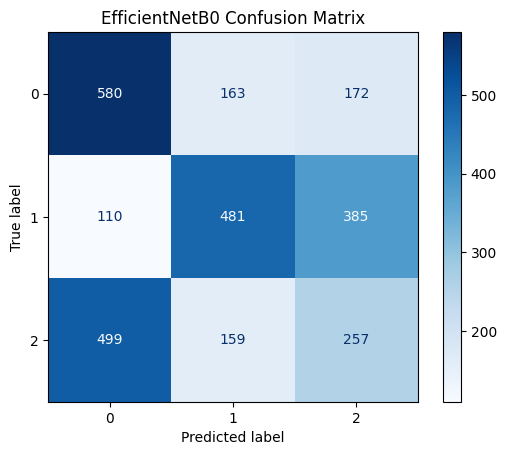

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Run prediction on your test dataset
y_true = []
y_pred = []

for images, labels in test_ds:      # ← your test tf.data pipeline
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    y_pred.extend(preds)
    y_true.extend(labels.numpy())   # if one-hot encoded

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 3. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("EfficientNetB0 Confusion Matrix")
plt.show()

In [ ]:
class_names = train_ds.class_names
print(class_names)

['MildDementia', 'NonDemented', 'VeryMildDementia']


In [ ]:
# =================================================================================================================================================================== #

In [ ]:
#ResNet50 ver2
IMAGE_SIZE = (240, 240)
BATCH_SIZE = 16
NUM_CLASSES = 3

base_split_dir = '/content/drive/Shared drives/BME 677 Shared Drive/images/SelectedImages/ProcessedImages/DataSplitting'

train_dir = base_split_dir + '/train'
val_dir   = base_split_dir + '/val'
test_dir  = base_split_dir + '/test'

AUTOTUNE = tf.data.AUTOTUNE

# ============================
# 4. Datasets (raw)
# ============================
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Save class names BEFORE prefetch
class_names = test_ds_raw.class_names
print("Class names:", class_names)


Found 10065 files belonging to 3 classes.
Found 2196 files belonging to 3 classes.
Found 2806 files belonging to 3 classes.
Class names: ['MildDementia', 'NonDemented', 'VeryMildDementia']


In [ ]:
train_ds = (train_ds_raw
            .cache()
            .shuffle(1000)
            .prefetch(AUTOTUNE))

val_ds = (val_ds_raw
          .cache()
          .prefetch(AUTOTUNE))

test_ds = (test_ds_raw
           .cache()
           .prefetch(AUTOTUNE))

# ============================
# 6. Data augmentation
# ============================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(10/360),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.1),
], name="data_augmentation")

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
)

# Phase 1: freeze backbone
base_model.trainable = False

inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(
    128,
    activation='relu',
    kernel_regularizer=regularizers.l2(1e-4)
)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs, outputs, name="ResNet50_MRI")

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "ResNet50_MRI"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 240, 240,  │          0 │ input_layer_1[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 240, 240)  │          0 │ data_augmentatio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 240, 240)  │          0 │ data_augmentatio… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 240, 240,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 240, 240,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 8, 8,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 2048)      │      8,192 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    262,272 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │        387 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,858,563 (91.01 MB)

 Trainable params: 266,755 (1.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


# ============================
# 9. Train – Phase 1
# ============================
EPOCHS_PHASE1 = 20

history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE1,
    callbacks=[early_stop, reduce_lr],
)

Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 1194s 404ms/step - accuracy: 0.5018 - loss: 1.3336 - val_accuracy: 0.6015 - val_loss: 1.1926 - learning_rate: 1.0000e-04
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.6819 - loss: 0.7883 - val_accuracy: 0.6612 - val_loss: 1.1866 - learning_rate: 1.0000e-04
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7558 - loss: 0.6239 - val_accuracy: 0.6749 - val_loss: 1.1300 - learning_rate: 1.0000e-04
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 59s 93ms/step - accuracy: 0.7874 - loss: 0.5440 - val_accuracy: 0.6844 - val_loss: 1.1683 - learning_rate: 1.0000e-04
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8207 - loss: 0.4710 - val_accuracy: 0.6821 - val_loss: 1.1050 - learning_rate: 1.0000e-04
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.8320 - loss: 0.4411 - val_accuracy: 0.6776 - val_loss: 1.2171 - learning_rate: 1.0000e-04
Epoch 7/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/s

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS_PHASE2 = 20

history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE2,
    callbacks=[early_stop, reduce_lr],
)

Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.7870 - loss: 0.5234 - val_accuracy: 0.6958 - val_loss: 1.1292 - learning_rate: 1.0000e-05
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.8600 - loss: 0.3790 - val_accuracy: 0.6995 - val_loss: 1.2027 - learning_rate: 1.0000e-05
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.8945 - loss: 0.2942 - val_accuracy: 0.7127 - val_loss: 1.0976 - learning_rate: 1.0000e-05
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.9225 - loss: 0.2309 - val_accuracy: 0.7140 - val_loss: 1.1468 - learning_rate: 1.0000e-05
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9382 - loss: 0.1966
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
630/630 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.9382 - loss: 0.1966 - val_accuracy: 0.7072 - val_loss: 1.1463 - learning_rate: 1.0000e-05
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/st

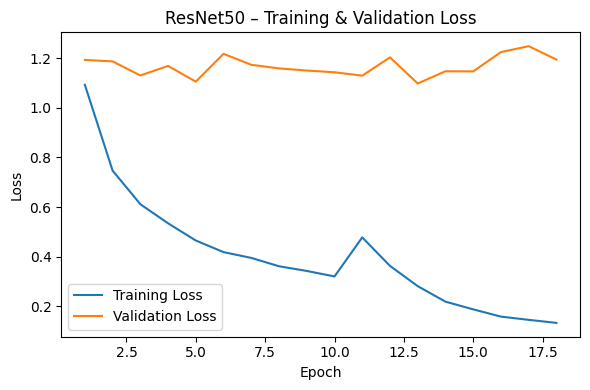

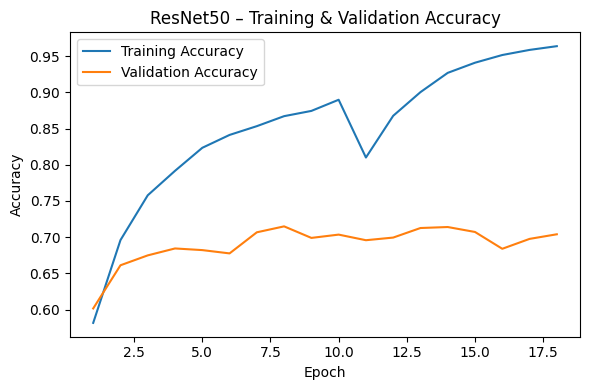

In [ ]:
import matplotlib.pyplot as plt

def plot_histories(histories, title_prefix="ResNet50"):
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    # histories is a list like [history1, history2]
    for h in histories:
        acc      += h.history.get("accuracy", [])
        val_acc  += h.history.get("val_accuracy", [])
        loss     += h.history.get("loss", [])
        val_loss += h.history.get("val_loss", [])

    epochs = range(1, len(acc) + 1)

    # ----- Loss -----
    plt.figure(figsize=(6,4))
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} – Training & Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ----- Accuracy -----
    plt.figure(figsize=(6,4))
    plt.plot(epochs, acc, label="Training Accuracy")
    plt.plot(epochs, val_acc, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} – Training & Validation Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_histories([history1, history2], title_prefix="ResNet50")


In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=0)

print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 52.85%
Test Loss: 1.7018


Confusion Matrix:
[[495 147 273]
 [147 665 164]
 [370 222 323]]

Classification Report:
                  precision    recall  f1-score   support

    MildDementia       0.49      0.54      0.51       915
     NonDemented       0.64      0.68      0.66       976
VeryMildDementia       0.42      0.35      0.39       915

        accuracy                           0.53      2806
       macro avg       0.52      0.53      0.52      2806
    weighted avg       0.52      0.53      0.52      2806



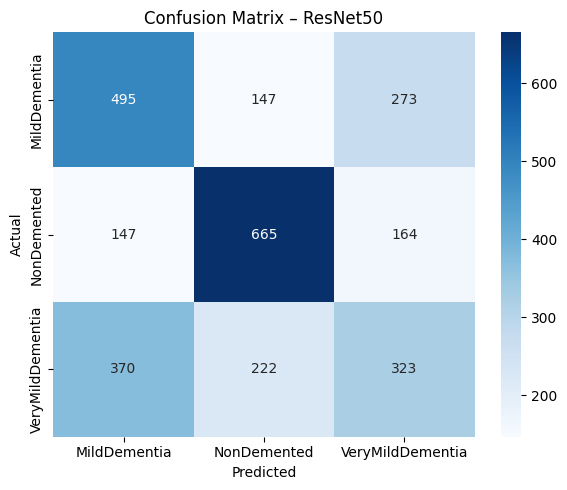

In [ ]:
import seaborn as sns

# -----------------------------
# 1. Collect true labels
# -----------------------------
y_true = np.concatenate([y.numpy() for _, y in test_ds])

# -----------------------------
# 2. Predict using ResNet50
# -----------------------------
y_pred_proba = model.predict(test_ds, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

# -----------------------------
# 3. Compute confusion matrix
# -----------------------------
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# -----------------------------
# 4. Classification report
# -----------------------------
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# -----------------------------
# 5. Plot confusion matrix
# -----------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            cmap='Blues',
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ResNet50")
plt.tight_layout()
plt.show()